In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
from pprint import pprint

In [2]:
from sklearn.datasets import load_iris

iris_data=load_iris()

df=pd.DataFrame(iris_data.data)
df.columns=iris_data.feature_names
df['type']=iris_data.target
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


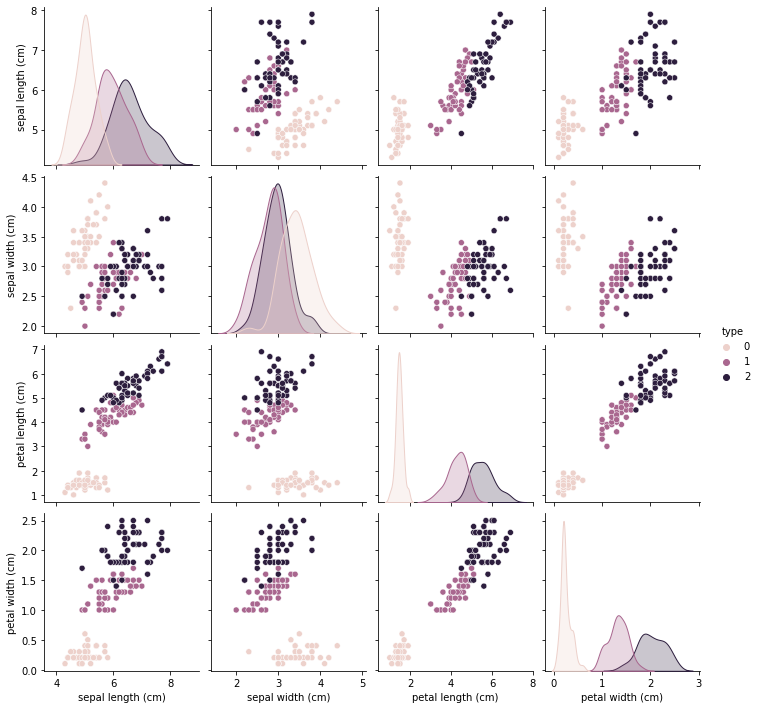

In [3]:
sns.pairplot(df, hue='type')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

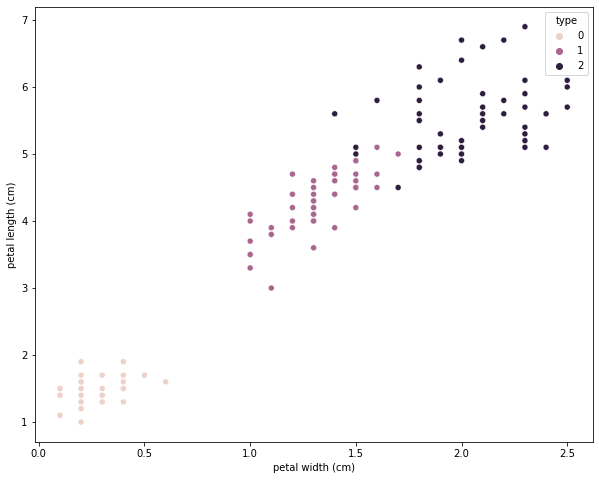

In [4]:
plt.figure(figsize = (10,8))
sns.scatterplot(df['petal width (cm)'], df['petal length (cm)'], hue="type", data=df)

In [5]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
#     print(indices)
    
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [6]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)

In [7]:
train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
train_df.shape

(130, 5)

In [9]:
test_df.shape

(20, 5)

In [10]:
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [11]:
## check purity

In [12]:
def check_purity(data):
    
    label_col=data[:,-1]
    unique_class=np.unique(label_col)
    
    if len(unique_class)==1:
        return True
    else:
        return False

In [13]:
check_purity(df[df['petal width (cm)']<1.0].values)

True

In [14]:
# classify data

In [15]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [16]:
classify_data(df[(df['petal width (cm)']>0.5) & (df['petal width (cm)']< 1.0)].values)

0.0

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
def gini(sample):
    prob=0
    for i in sample:
        prob+=(i/sum(sample))**2
        
    gini=1-prob
    return gini
    

In [19]:
gini([549,342])

0.4730129578614428

In [20]:
def entropy(sample):
    
    probabilities=[]
    for i in sample:
        prob=i/sum(sample)
        probabilities.append(prob)
        
    
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [21]:
entropy([6,2])

0.8112781244591328

In [22]:
def get_potential_splits(data):
    
    potential_splits = {}
    x, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [23]:
potential_split=get_potential_splits(df.values)

In [24]:
val=df['sepal length (cm)'].unique()
val=np.sort(val)
val

array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9])

In [25]:
potential_split

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.25,
  7.35,
  7.5,
  7.65,
  7.800000000000001],
 1: [2.1,
  2.25,
  2.3499999999999996,
  2.45,
  2.55,
  2.6500000000000004,
  2.75,
  2.8499999999999996,
  2.95,
  3.05,
  3.1500000000000004,
  3.25,
  3.3499999999999996,
  3.45,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.300000000000001],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.7999999999999998,
  2.45,
  3.15,
  3.4,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.199999999999999,
  6.35,
  6.5,
  6.65,
  6.800000000000001],
 3: [0.150000000

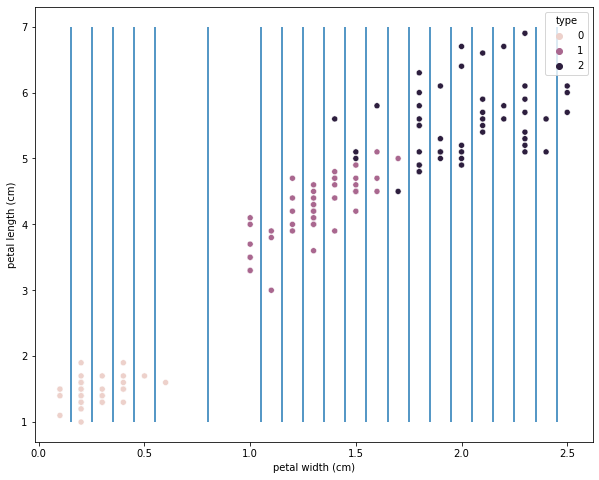

In [26]:
plt.figure(figsize = (10,8))
sns.scatterplot(x=df['petal width (cm)'],y= df['petal length (cm)'], hue="type", data=df)
plt.vlines(x=potential_split[3], ymin=1, ymax=7)
# plt.hlines(y=potential_split[2], xmin=0, xmax=2.5)

In [27]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [28]:
split_data(data,3,0.8)

(array([[5.1, 3.5, 1.4, 0.2, 0. ],
        [4.9, 3. , 1.4, 0.2, 0. ],
        [4.7, 3.2, 1.3, 0.2, 0. ],
        [4.6, 3.1, 1.5, 0.2, 0. ],
        [5. , 3.6, 1.4, 0.2, 0. ],
        [5.4, 3.9, 1.7, 0.4, 0. ],
        [4.6, 3.4, 1.4, 0.3, 0. ],
        [5. , 3.4, 1.5, 0.2, 0. ],
        [4.4, 2.9, 1.4, 0.2, 0. ],
        [4.9, 3.1, 1.5, 0.1, 0. ],
        [4.8, 3.4, 1.6, 0.2, 0. ],
        [4.8, 3. , 1.4, 0.1, 0. ],
        [4.3, 3. , 1.1, 0.1, 0. ],
        [5.8, 4. , 1.2, 0.2, 0. ],
        [5.7, 4.4, 1.5, 0.4, 0. ],
        [5.4, 3.9, 1.3, 0.4, 0. ],
        [5.1, 3.5, 1.4, 0.3, 0. ],
        [5.7, 3.8, 1.7, 0.3, 0. ],
        [5.1, 3.8, 1.5, 0.3, 0. ],
        [5.4, 3.4, 1.7, 0.2, 0. ],
        [5.1, 3.7, 1.5, 0.4, 0. ],
        [4.6, 3.6, 1. , 0.2, 0. ],
        [5.1, 3.3, 1.7, 0.5, 0. ],
        [5. , 3. , 1.6, 0.2, 0. ],
        [5. , 3.4, 1.6, 0.4, 0. ],
        [5.2, 3.5, 1.5, 0.2, 0. ],
        [5.2, 3.4, 1.4, 0.2, 0. ],
        [4.7, 3.2, 1.6, 0.2, 0. ],
        [4.8, 3.1, 1

In [29]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [30]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [31]:
entropy([3,4])

0.9852281360342515

In [32]:
entropy([6,1])

0.5916727785823275

In [59]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        
        print(column_index)
        
        for value in potential_splits[column_index]:
            
            print(value)
            
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
#     print(overall_entropy)
    
    return best_split_column, best_split_value

In [60]:
determine_best_split(data,potential_split)

0
4.35
4.45
4.55
4.65
4.75
4.85
4.95
5.05
5.15
5.25
5.35
5.45
5.55
5.65
5.75
5.85
5.95
6.05
6.15
6.25
6.35
6.45
6.55
6.65
6.75
6.85
6.95
7.05
7.15
7.25
7.35
7.5
7.65
7.800000000000001
1
2.1
2.25
2.3499999999999996
2.45
2.55
2.6500000000000004
2.75
2.8499999999999996
2.95
3.05
3.1500000000000004
3.25
3.3499999999999996
3.45
3.55
3.6500000000000004
3.75
3.8499999999999996
3.95
4.05
4.15
4.300000000000001
2
1.05
1.15
1.25
1.35
1.45
1.55
1.65
1.7999999999999998
2.45
3.15
3.4
3.55
3.6500000000000004
3.75
3.8499999999999996
3.95
4.05
4.15
4.25
4.35
4.45
4.55
4.65
4.75
4.85
4.95
5.05
5.15
5.25
5.35
5.45
5.55
5.65
5.75
5.85
5.95
6.05
6.199999999999999
6.35
6.5
6.65
6.800000000000001
3
0.15000000000000002
0.25
0.35
0.45
0.55
0.8
1.05
1.15
1.25
1.35
1.45
1.55
1.65
1.75
1.85
1.95
2.05
2.1500000000000004
2.25
2.3499999999999996
2.45


(3, 0.8)

### Representation of the Decision Tree

In [35]:
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

In [36]:
example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

In [37]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=2):
    

    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    else:    
        counter += 1

         
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # recursion
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [38]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'petal width (cm) <= 0.8': [0.0,
                             {'petal width (cm) <= 1.65': [{'petal length (cm) <= 4.95': [1.0,
                                                                                          2.0]},
                                                           2.0]}]}


In [39]:
example=test_df.iloc[0]

In [40]:
example

sepal length (cm)    5.1
sepal width (cm)     2.5
petal length (cm)    3.0
petal width (cm)     1.1
type                 1.0
Name: 98, dtype: float64

In [41]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    a,b,c,comparison_operator,value=question.split()
    
    feature_name = a+' '+b+' '+c

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [42]:
classify_example(example, tree)

1.0

In [47]:

def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, args=(tree,), axis=1)
    df["classification_correct"] = df["classification"] == df["type"]
    
    
    print(df)
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [48]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
98                 5.1               2.5                3.0               1.1   
107                7.3               2.9                6.3               1.8   
10                 5.4               3.7                1.5               0.2   
66                 5.6               3.0                4.5               1.5   
130                7.4               2.8                6.1               1.9   
124                6.7               3.3                5.7               2.1   
103                6.3               2.9                5.6               1.8   
77                 6.7               3.0                5.0               1.7   
122                7.7               2.8                6.7               2.0   
91                 6.1               3.0                4.6               1.4   
149                5.9               3.0                5.1               1.8   
55                 5.7      

0.95

In [53]:
l=[True,False]

In [54]:
np.mean(l)

0.5

In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [101]:
dc=DecisionTreeClassifier(criterion='entropy')

In [102]:
X=train_df.drop('type', axis=1)
y=train_df.type

In [103]:
dc.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

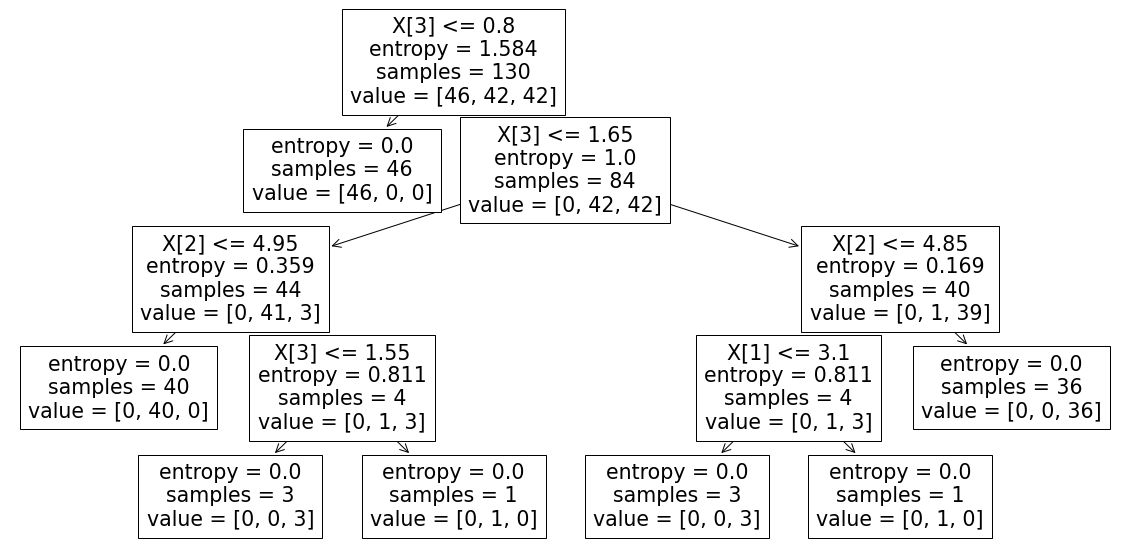

In [104]:
from sklearn import tree

plt.figure(figsize=(20,10))
plot_tree(dc)
plt.show()

In [78]:
print( 5<4 or 5<4  or 5>3)

True
